In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', palette='rainbow')

In [2]:
df=yf.download('ADANIENT.NS',start="2020-01-01")
df.dropna(inplace=True,axis=0)
df.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,209.000000,210.449997,206.649994,207.850006,206.116074,1553127
2020-01-02,208.000000,213.199997,207.500000,211.199997,209.438110,2991937
2020-01-03,210.250000,212.350006,205.800003,208.300003,206.562317,2512421
2020-01-06,207.750000,207.750000,197.750000,199.550003,197.885315,4353179
2020-01-07,200.550003,205.699997,200.550003,204.050003,202.347748,2966120
2020-01-08,201.000000,203.550003,194.550003,201.500000,199.819031,5762654
2020-01-09,201.899994,208.899994,201.899994,208.000000,206.264832,3496063
2020-01-10,208.000000,213.000000,205.899994,209.100006,207.355652,2769132
2020-01-13,210.649994,216.250000,209.600006,213.600006,211.818100,3527267


In [3]:
df.loc[(df == 0).any(axis=1),'Volume']=df['Volume'].mean()

In [4]:
df.dropna(inplace=True,axis=0)
df[(df == 0).any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
df.info()
# no empty or missing data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 868 entries, 2020-01-01 to 2023-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       868 non-null    float64
 1   High       868 non-null    float64
 2   Low        868 non-null    float64
 3   Close      868 non-null    float64
 4   Adj Close  868 non-null    float64
 5   Volume     868 non-null    float64
dtypes: float64(6)
memory usage: 47.5 KB


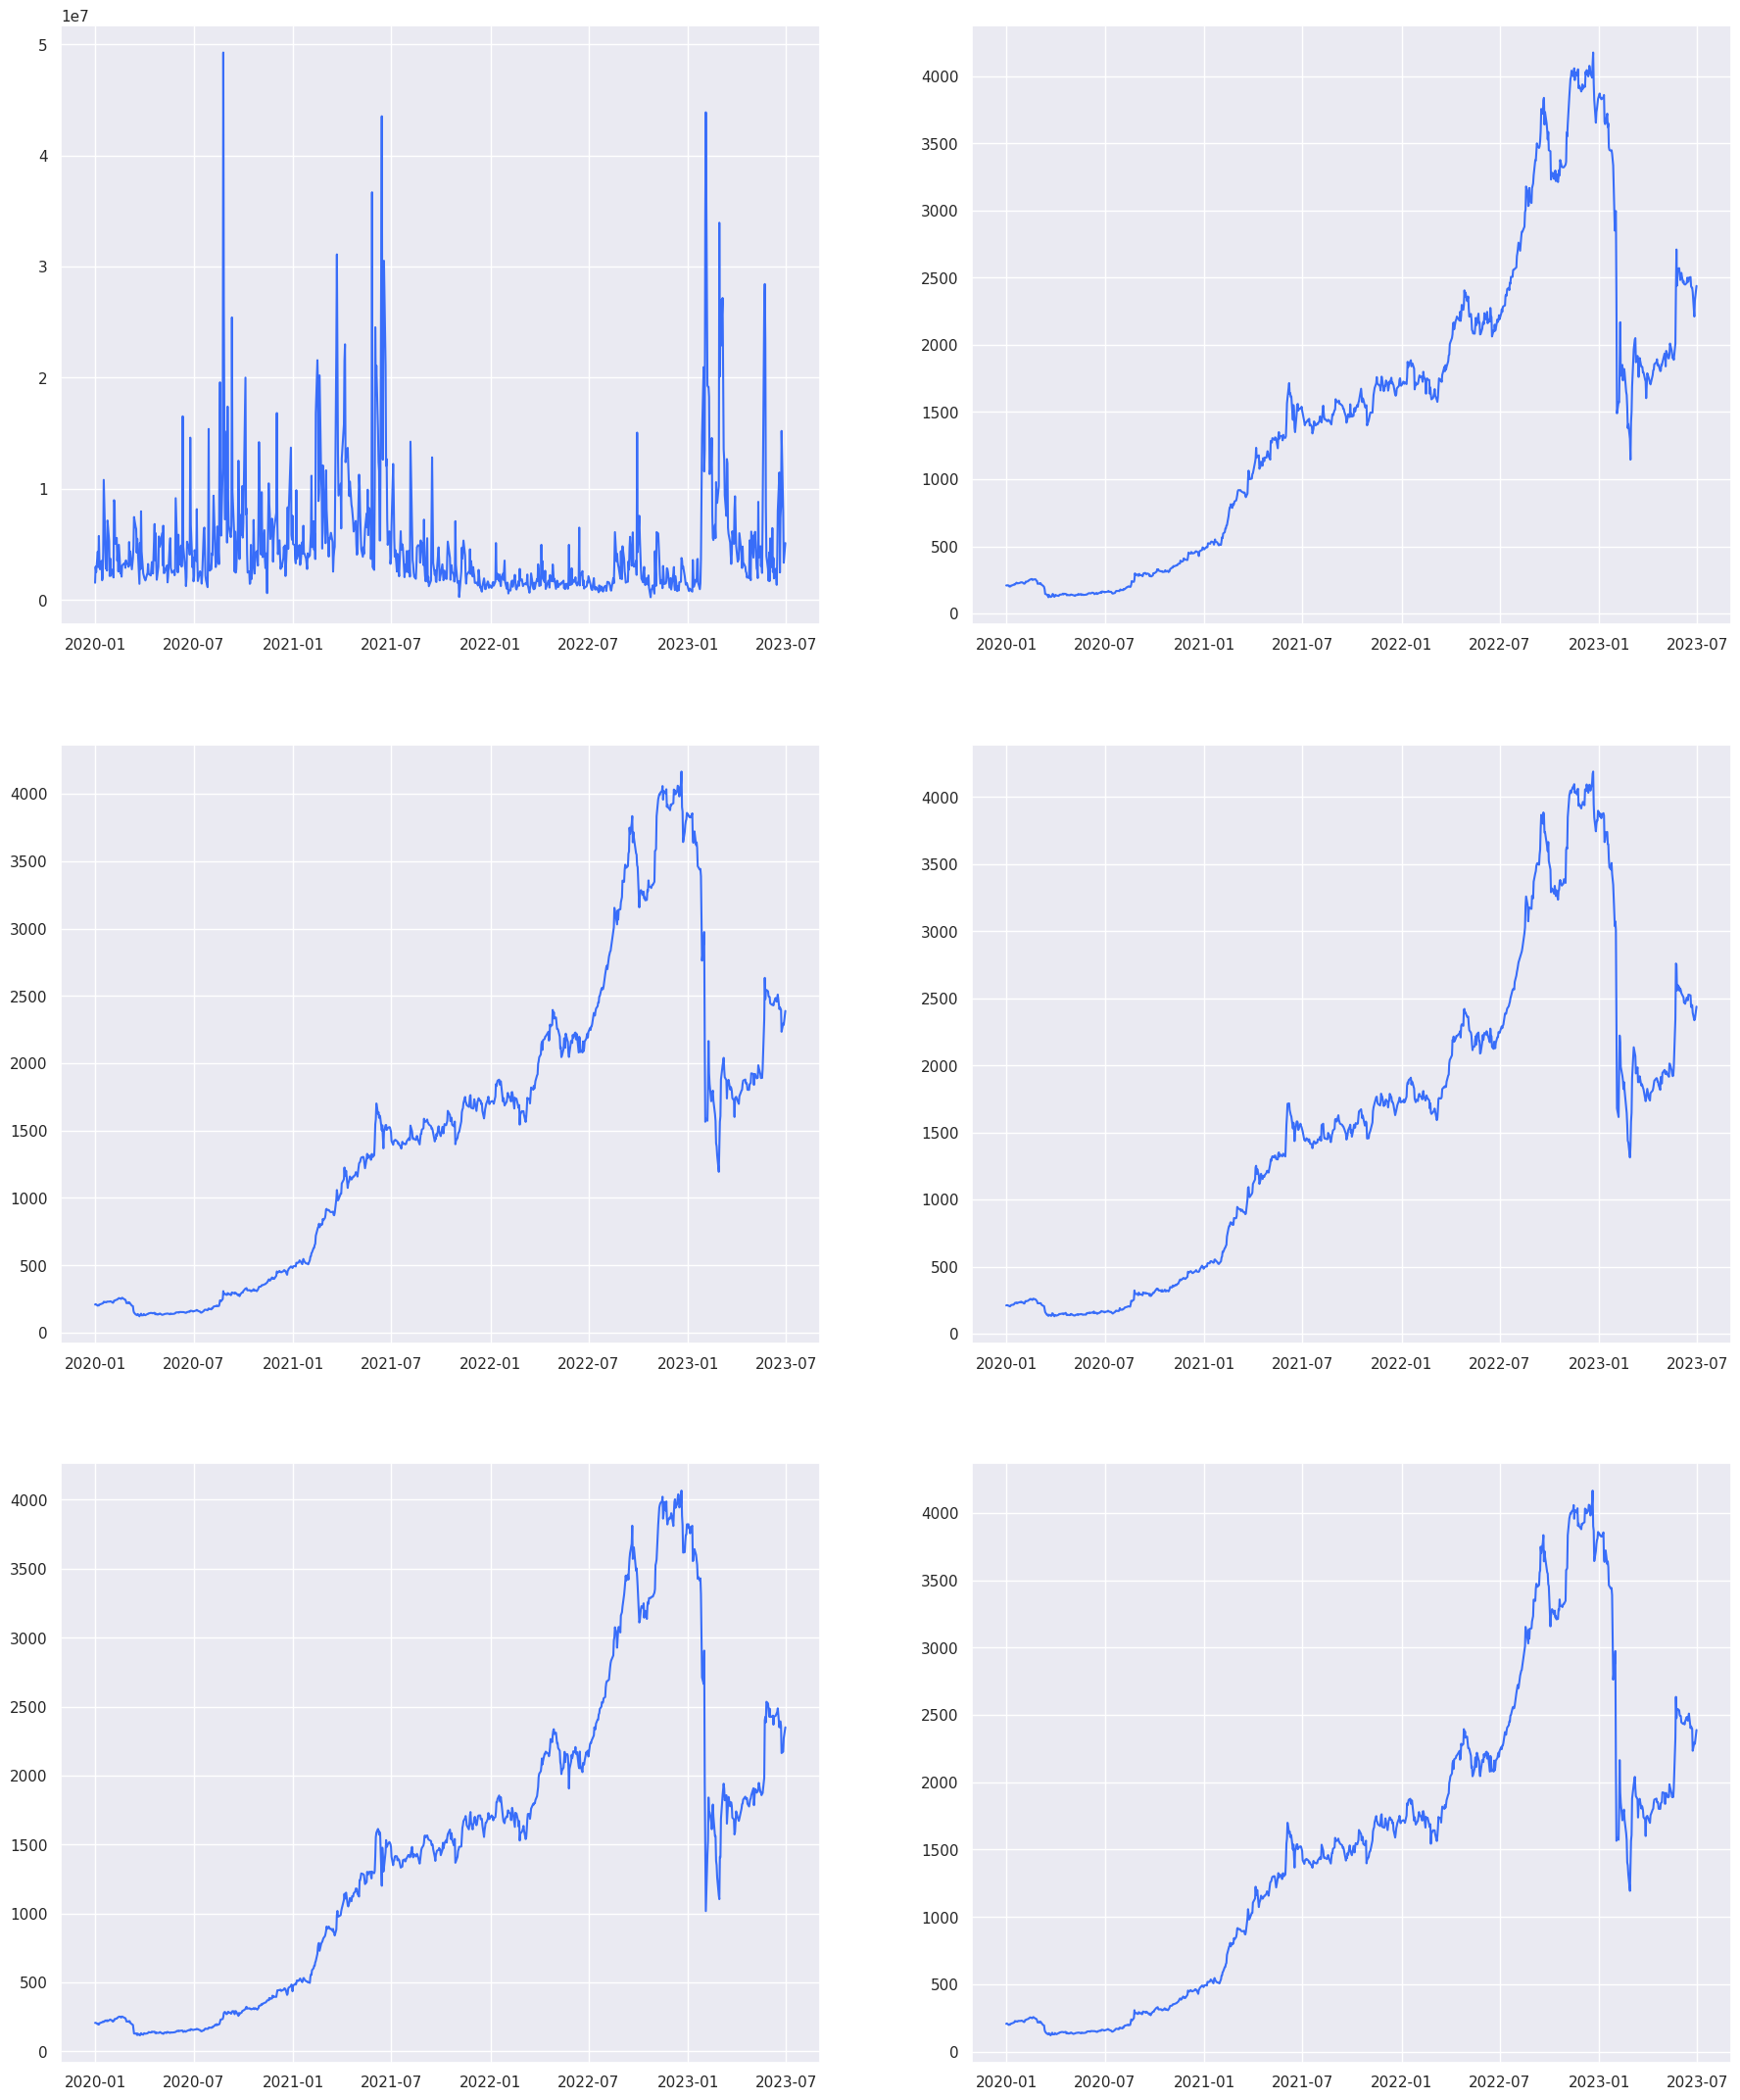

In [6]:
fig,ax=plt.subplots(3,2,figsize=(22,27))
ax[0,0].plot(df['Volume'])
ax[0,1].plot(df['Open'])
ax[1,0].plot(df['Close'])
ax[1,1].plot(df['High'])
ax[2,0].plot(df['Low'])
ax[2,1].plot(df['Adj Close'])
plt.show()

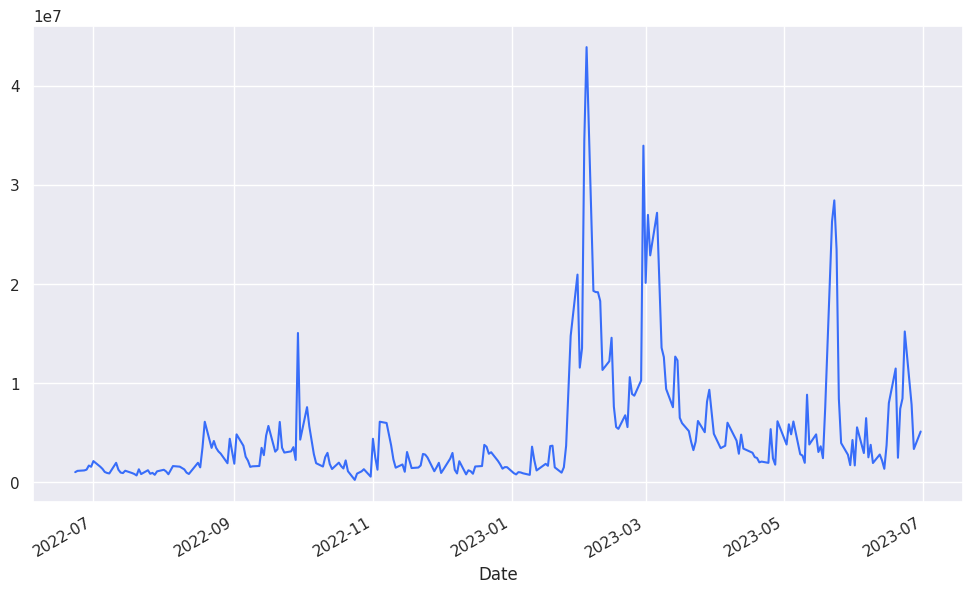

In [7]:
fig=plt.figure(figsize=(12,7))
df['Volume'].tail(252).plot()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_scaled.std()

Open         1.000577
High         1.000577
Low          1.000577
Close        1.000577
Adj Close    1.000577
Volume       1.000577
dtype: float64

        daily  mv_avg_2  mv_avg_3  mv_avg_5  mv_avg__8  mv_avg_13  mv_avg_21  \
0   -1.177595       NaN       NaN       NaN        NaN        NaN        NaN   
1   -1.174572 -1.176083       NaN       NaN        NaN        NaN        NaN   
2   -1.177189 -1.175880 -1.176452       NaN        NaN        NaN        NaN   
3   -1.185086 -1.181138 -1.178949       NaN        NaN        NaN        NaN   
4   -1.181025 -1.183056 -1.181100 -1.179093        NaN        NaN        NaN   
..        ...       ...       ...       ...        ...        ...        ...   
863  0.798489  0.802415  0.806386  0.824257   0.838693   0.840729   0.858970   
864  0.650738  0.724614  0.751856  0.774426   0.812857   0.826836   0.845908   
865  0.706743  0.678741  0.718657  0.755328   0.794630   0.816842   0.835217   
866  0.696679  0.701711  0.684720  0.731798   0.771931   0.806796   0.824489   
867  0.790185  0.743432  0.731202  0.728567   0.758217   0.802415   0.819830   

     mv_avg_34  mv_avg_55  daily_vol  m

<Axes: >

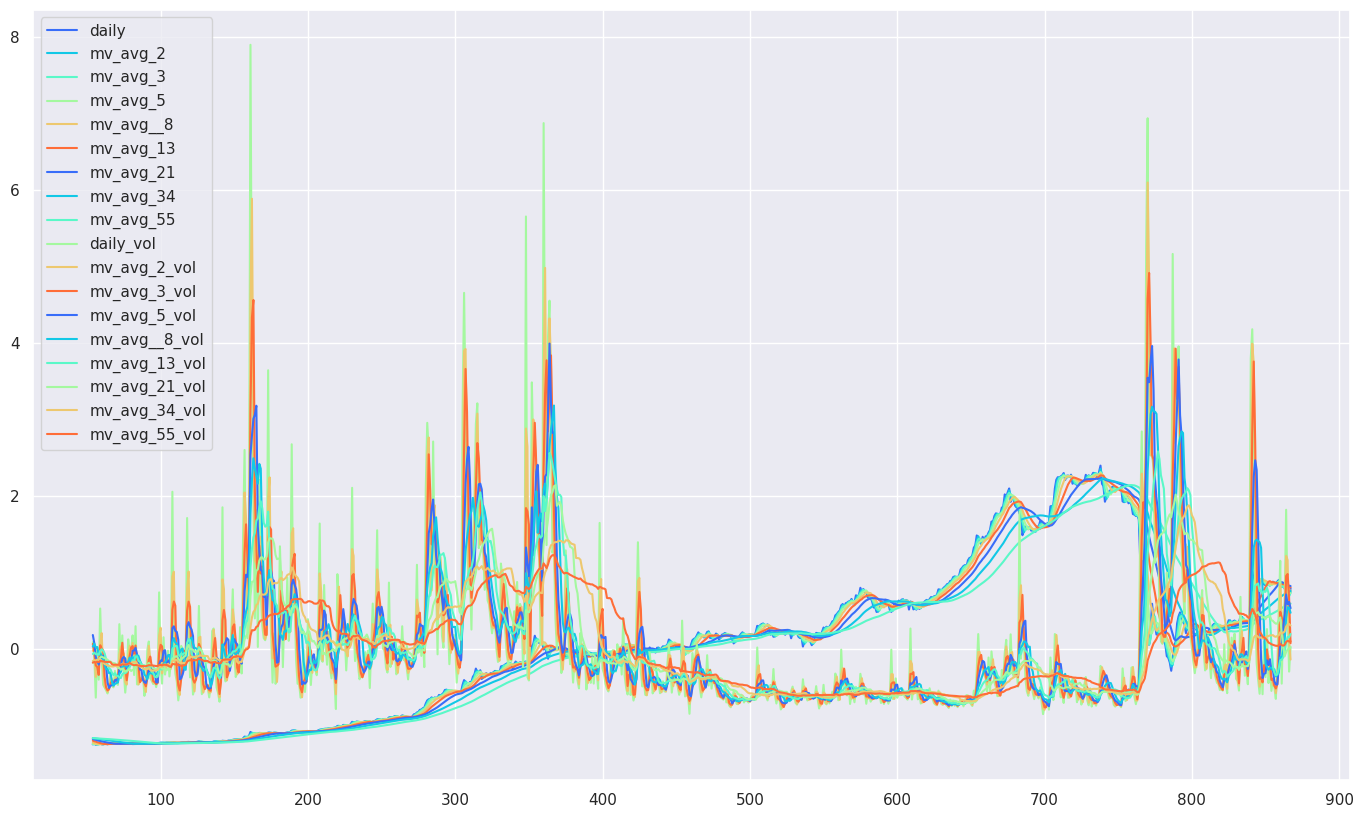

In [9]:
train_data=pd.DataFrame()
# using moving avgerage with fibonacci day frame
train_data['daily']=df_scaled['Close']
train_data['mv_avg_2']=df_scaled['Close'].rolling(window=2).mean()
train_data['mv_avg_3']=df_scaled['Close'].rolling(window=3).mean()
train_data['mv_avg_5']=df_scaled['Close'].rolling(window=5).mean()
train_data['mv_avg__8']=df_scaled['Close'].rolling(window=8).mean()
train_data['mv_avg_13']=df_scaled['Close'].rolling(window=13).mean()
train_data['mv_avg_21']=df_scaled['Close'].rolling(window=21).mean()
train_data['mv_avg_34']=df_scaled['Close'].rolling(window=34).mean()
train_data['mv_avg_55']=df_scaled['Close'].rolling(window=55).mean()
train_data['daily_vol']=df_scaled['Volume']
train_data['mv_avg_2_vol']=df_scaled['Volume'].rolling(window=2).mean()
train_data['mv_avg_3_vol']=df_scaled['Volume'].rolling(window=3).mean()
train_data['mv_avg_5_vol']=df_scaled['Volume'].rolling(window=5).mean()
train_data['mv_avg__8_vol']=df_scaled['Volume'].rolling(window=8).mean()
train_data['mv_avg_13_vol']=df_scaled['Volume'].rolling(window=13).mean()
train_data['mv_avg_21_vol']=df_scaled['Volume'].rolling(window=21).mean()
train_data['mv_avg_34_vol']=df_scaled['Volume'].rolling(window=34).mean()
train_data['mv_avg_55_vol']=df_scaled['Volume'].rolling(window=55).mean()
# train_data['vol_change']=df_scaled['Volume'].pct_change() #negative and small correlation with aother variable
print(train_data)

train_data.dropna(axis=0,inplace=True)
print(train_data.cov())
print(train_data.corr())
train_data.plot(figsize=(17,10))


In [10]:
y_data=pd.DataFrame()
y_data['Close']=df_scaled['Close']
print(y_data.iloc[42,:])

Close   -1.167893
Name: 42, dtype: float64


In [11]:
n_steps=3
n_features=train_data.columns.shape[0]
X = []
y = []
for i in np.arange(n_steps, len(train_data)):
    X.append(train_data.iloc[i-n_steps:i, :])
    y.append(y_data.iloc[i,:])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], n_steps, n_features))
print(X.shape)
print(y.shape)

(811, 3, 18)
(811, 1)


In [12]:
# !pip install keras

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Bidirectional(LSTM(units=32, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True,activation=LeakyReLU(alpha=0.9999))))
model.add(Bidirectional(LSTM(units=44, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.25)))
model.add(Bidirectional(LSTM(units=128, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.75)))
model.add(Bidirectional(LSTM(units=64, use_bias=True,activation=LeakyReLU(alpha=0.9999),dropout=0.5)))
model.add(Dense(units=1, activation='linear'))
model.compile(loss='mse', optimizer=Adam(0.001,clipnorm=0.01), metrics=['accuracy','mse','mae'])
# model.build()
# model.summary()


In [15]:
history = model.fit(X, y, epochs=50, batch_size=32)
# history = model.fit(X, y, epochs=100, batch_size=12, validation_data=(X, y))

Epoch 1/50
26/26 [==============================] - 29s 96ms/step - loss: 0.5553 - accuracy: 0.0000e+00 - mse: 0.5553 - mae: 0.5271
Epoch 2/50
26/26 [==============================] - 2s 87ms/step - loss: 0.2117 - accuracy: 0.0000e+00 - mse: 0.2117 - mae: 0.2886
Epoch 3/50
26/26 [==============================] - 2s 78ms/step - loss: 0.1233 - accuracy: 0.0000e+00 - mse: 0.1233 - mae: 0.2347
Epoch 4/50
26/26 [==============================] - 2s 71ms/step - loss: 0.1166 - accuracy: 0.0000e+00 - mse: 0.1166 - mae: 0.2374
Epoch 5/50
26/26 [==============================] - 2s 71ms/step - loss: 0.0835 - accuracy: 0.0000e+00 - mse: 0.0835 - mae: 0.2032
Epoch 6/50
26/26 [==============================] - 2s 65ms/step - loss: 0.0854 - accuracy: 0.0000e+00 - mse: 0.0854 - mae: 0.1994
Epoch 7/50
26/26 [==============================] - 2s 84ms/step - loss: 0.0667 - accuracy: 0.0000e+00 - mse: 0.0667 - mae: 0.1845
Epoch 8/50
26/26 [==============================] - 2s 93ms/step - loss: 0.0580 - 

In [16]:
y_predit=model.predict(X)

26/26 [==============================] - 2s 15ms/step


In [17]:
y.shape

(811, 1)

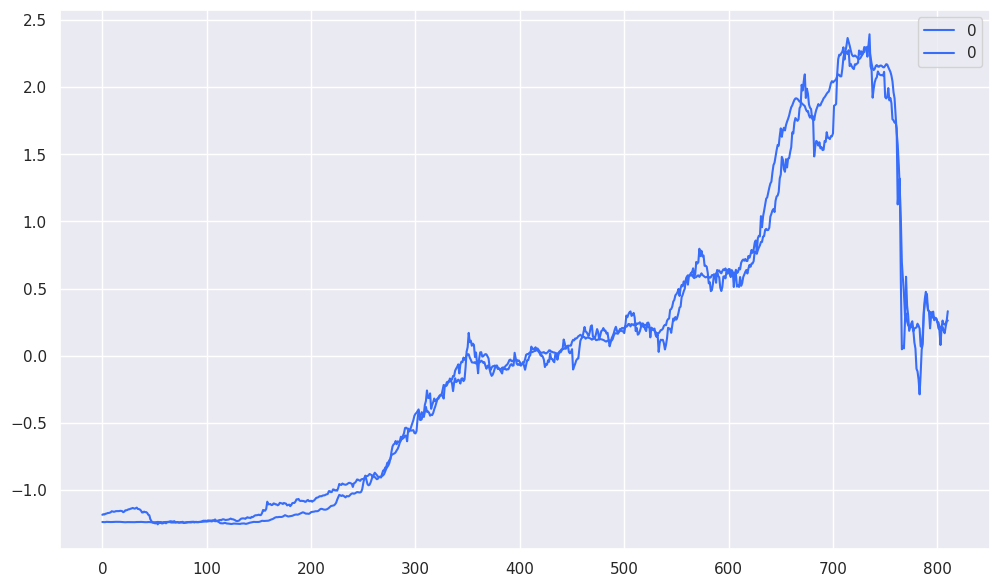

In [25]:
fig=plt.figure(figsize=(12,7))
sns.lineplot(y)
sns.lineplot(y_predit,color='black')
plt.show()

In [96]:

def calculate_moving_average(dataframe, win):
    ma = dataframe.rolling(window=win).mean()
    return pd.Series(ma, name=f'MA_{win}')


def calculate_relative_strength_index(dataframe, window):
    delta = dataframe.diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    ema_up = up.ewm(span=window, adjust=True,ignore_na=True).mean()
    ema_down = down.ewm(span=window, adjust=True,ignore_na=True).mean()
    avg_gain = up.rolling(window=window, min_periods=1).mean()
    avg_loss = down.rolling(window=window, min_periods=1).mean()
    rs_mva = avg_gain / avg_loss
    rs_ewm = ema_up / ema_down
    rsi_mva = 100 - (100 / (1 + rs_mva))
    rsi_ewm = 100 - (100 / (1 + rs_ewm))
    return pd.DataFrame({f"RSI_ewm_{window}": rsi_ewm,f"RSI_mva_{window}":rsi_mva},index=dataframe.index)

def calculate_bollinger_bands(dataframe, window):
    ma = dataframe.rolling(window=window).mean()
    std = dataframe.rolling(window=window).std()
    upper_band = ma + (2 * std)
    lower_band = ma - (2 * std)
    return pd.DataFrame({f'bb_Upper_Band_{window}': upper_band, f'bb_Lower_Band_{window}': lower_band},index=dataframe.index)

def calculate_stochastic_oscillator(dataframe, window):
    low = dataframe.rolling(window=window).min()
    high = dataframe.rolling(window=window).max()
    k = 100 * ((dataframe - low) / (high - low))
    d = k.rolling(window=3).mean()
    return pd.DataFrame({'%K': k, '%D': d},index=dataframe.index)

def train_data_build(df):
  data_model=pd.DataFrame(df['Adj Close'],index=df.index)
  # Example usage
  # stock_data = pd.read_csv('stock_data.csv')
  # stock_data['Date'] = pd.to_datetime(dataframe['Date'])
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],2)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],3)],axis=1)
  data_modeldata_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],5)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],8)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],13)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],21)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],34)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],9)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],14)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],25)],axis=1)
  data_model = pd.concat([data_model,calculate_bollinger_bands(df['Adj Close'],20)],axis=1)
  data_model = pd.concat([data_model,calculate_stochastic_oscillator(df['Adj Close'],14)],axis=1)
  data_model.corr()
  # bb_df = calculate_bollinger_bands(dataframe)
  # # stochastic_df = calculate_stochastic_oscillator(dataframe)
  # # Combine all the indicators into one DataFrame
  # data_model = pd.concat([data_model,ma_df, rsi_df],ignore_index=True)
  # # data_model[indicators_df.columns] = indicators_df
  # # data_model.dropna(inplace=True, axis=0)
  # data_model.info()
  data_model.dropna(inplace=True,axis=0)
  return data_model
  # print(indicators_df.head())
x=train_data_build(df_scaled)

<Axes: >

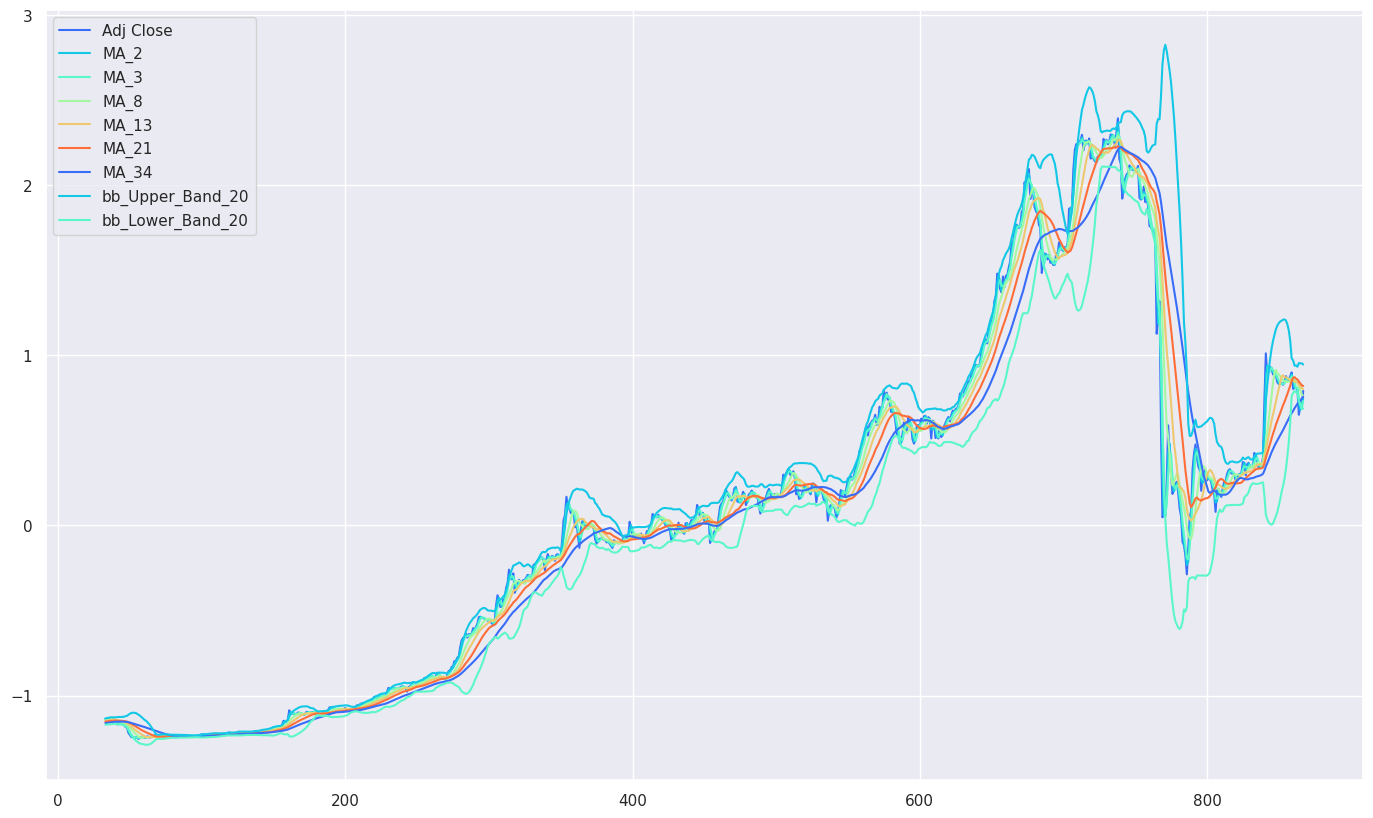

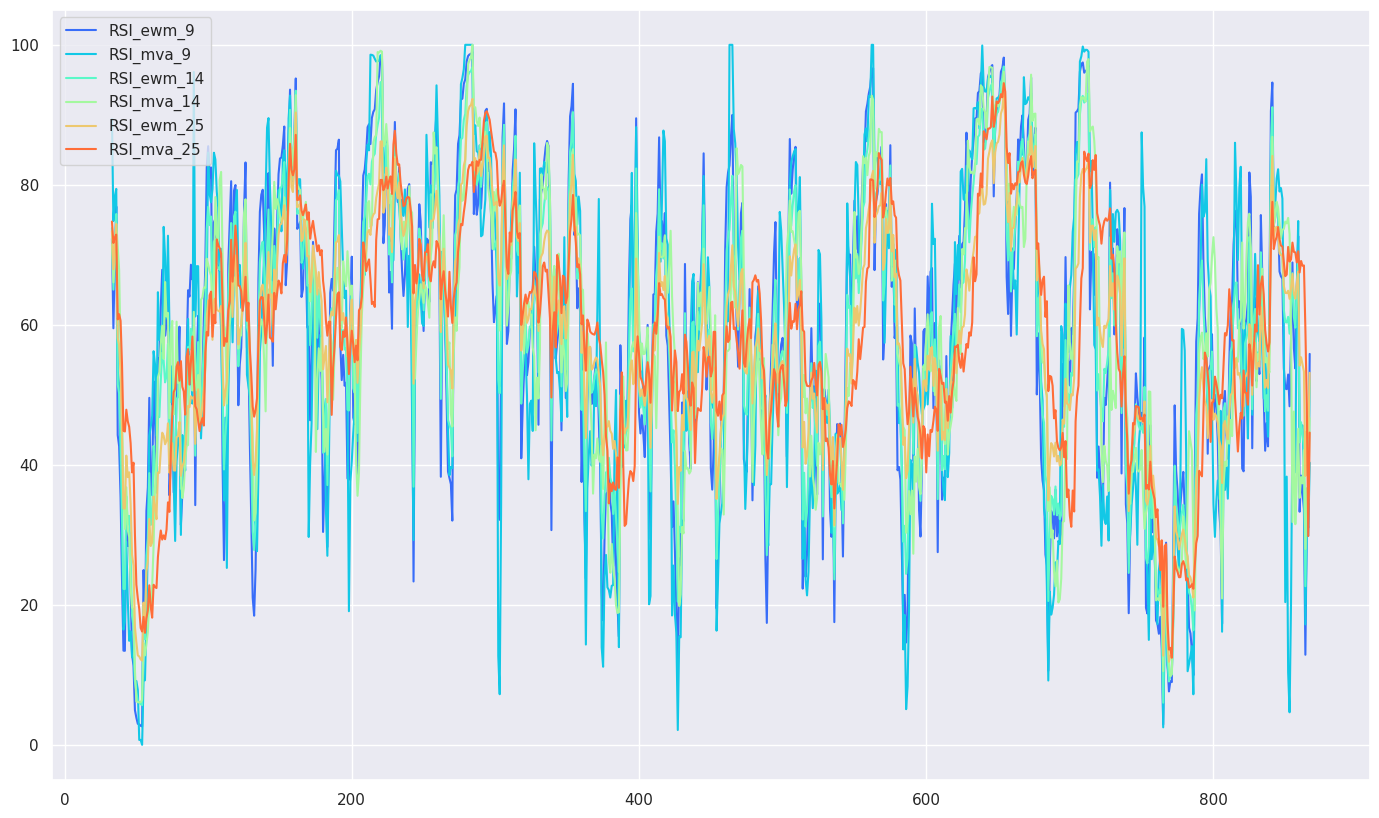

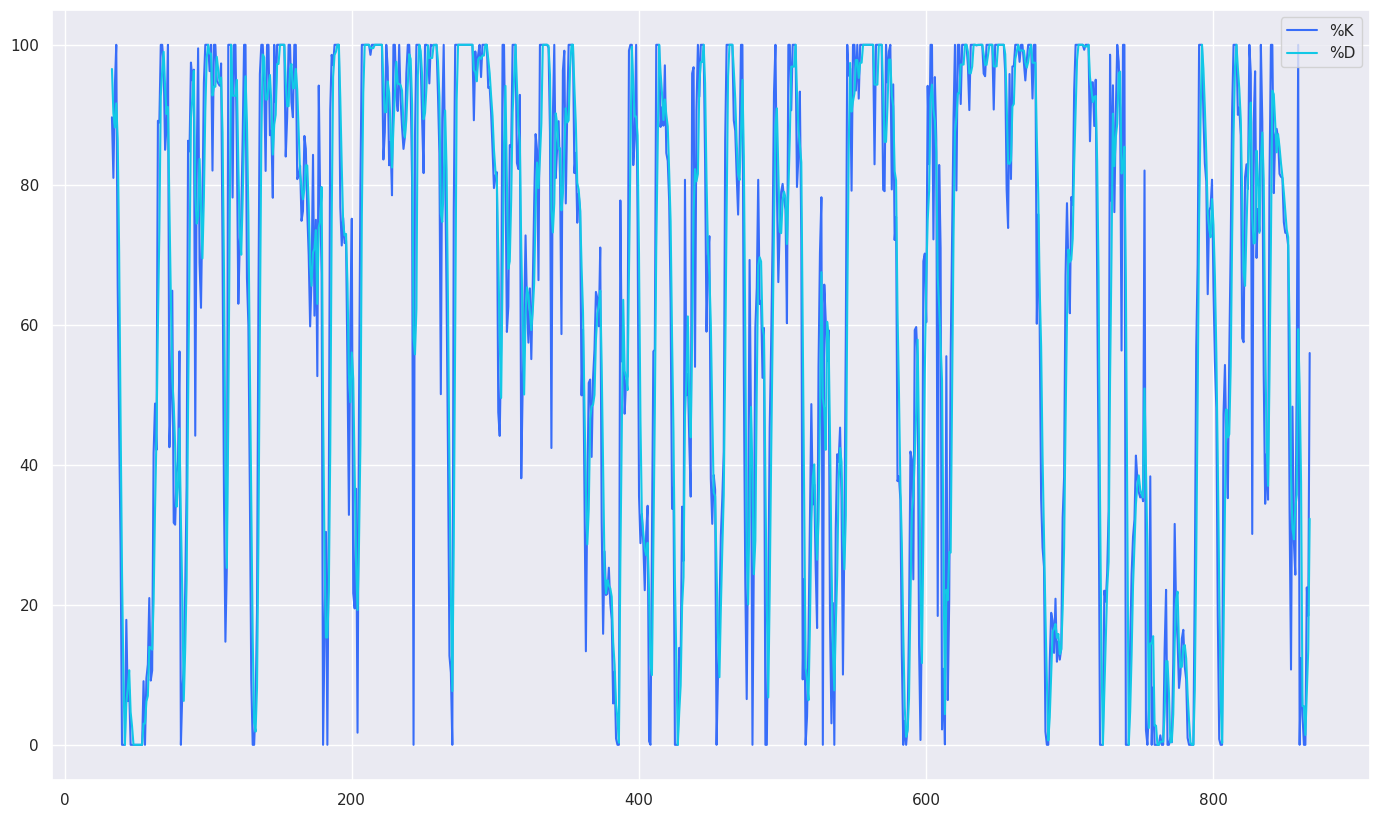

In [97]:
x[['Adj Close','MA_2','MA_3','MA_8','MA_13','MA_21','MA_34','bb_Upper_Band_20','bb_Lower_Band_20']].plot(figsize=(17,10))
x[['RSI_ewm_9','RSI_mva_9','RSI_ewm_14','RSI_mva_14','RSI_ewm_25','RSI_mva_25']].plot(figsize=(17,10))
x[['%K','%D']].plot(figsize=(17,10))

In [103]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, LeakyReLU,Dropout,BatchNormalization
from keras.losses import mean_squared_error
from keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import StandardScaler
# Define the LSTM model architecture

# Define the symbol for the stock to trade
symbol = 'ADANIENT.NS'

# Download historical stock prices for the given symbol
df = yf.download(symbol, start="2020-01-01")
df.dropna(inplace=True, axis=0)
# df.set_index('Date', inplace=True)


# Define the trading signals dataframe
trading_signals = pd.DataFrame(columns=['signal', 'price'])
trading_signals.loc[df.index[0], 'signal'] = 'Hold'
trading_signals.loc[df.index[0], 'price'] = df['Close'][0]


def data_reshape(x_train, y_train, n_steps, n_features, X, y):
    for i in np.arange(n_steps, len(x_train)):
        X.append(x_train.iloc[i-n_steps:i, :])
        y.append(y_train.iloc[i, :])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], n_steps, n_features))
    return X, y

# Define the trading strategy function


def trading_strategy(model, X,y_pred):
    y_pred = model.predict(X)
    return y_pred


def lstm_model(model,n_steps,n_features):
  model.add(Bidirectional(LSTM(units=204, return_sequences=True, input_shape=(n_steps, n_features), use_bias=True,activation=LeakyReLU(alpha=0.9999))))
  model.add(Bidirectional(LSTM(units=816, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.25)))
  model.add(Bidirectional(LSTM(units=272, return_sequences=True, use_bias=True,activation=LeakyReLU(alpha=0.6666),dropout=0.75)))
  model.add(Bidirectional(LSTM(units=408, use_bias=True,activation=LeakyReLU(alpha=0.9999),dropout=0.5)))
  model.add(Dense(units=1, activation='linear'))
  # model.compile(loss='Binary_cr', optimizer=Adam(0.001,clipnorm=0.01), metrics=['accuracy','mse','mae'])
  model.compile(loss='mse', optimizer=Adam(0.001,clipnorm=0.01), metrics=['accuracy','mse','mae'])
  # model.compile(optimizer='adam', loss=mean_squared_error)
  return model


def create_data_model(df):
  data_model=pd.DataFrame(df['Adj Close'],index=df.index)
  # Example usage
  # stock_data = pd.read_csv('stock_data.csv')
  # stock_data['Date'] = pd.to_datetime(dataframe['Date'])
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],2)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],3)],axis=1)
  data_modeldata_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],5)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],8)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],13)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],21)],axis=1)
  data_model=pd.concat([data_model,calculate_moving_average(df['Adj Close'],34)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],9)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],14)],axis=1)
  data_model = pd.concat([data_model,calculate_relative_strength_index(df['Adj Close'],25)],axis=1)
  data_model = pd.concat([data_model,calculate_bollinger_bands(df['Adj Close'],20)],axis=1)
  data_model = pd.concat([data_model,calculate_stochastic_oscillator(df['Adj Close'],14)],axis=1)
  data_model.corr()
  # bb_df = calculate_bollinger_bands(dataframe)
  # # stochastic_df = calculate_stochastic_oscillator(dataframe)
  # # Combine all the indicators into one DataFrame
  # data_model = pd.concat([data_model,ma_df, rsi_df],ignore_index=True)
  # # data_model[indicators_df.columns] = indicators_df
  # # data_model.dropna(inplace=True, axis=0)
  # data_model.info()
  data_model.dropna(inplace=True,axis=0)
  return data_model
    # print(indicators_df.head())


def calculate_moving_average(dataframe, win):
    ma = dataframe.rolling(window=win).mean()
    return pd.Series(ma, name=f'MA_{win}')


def calculate_relative_strength_index(dataframe, window):
    delta = dataframe.diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    ema_up = up.ewm(span=window, adjust=True,ignore_na=True).mean()
    ema_down = down.ewm(span=window, adjust=True,ignore_na=True).mean()
    avg_gain = up.rolling(window=window, min_periods=1).mean()
    avg_loss = down.rolling(window=window, min_periods=1).mean()
    rs_mva = avg_gain / avg_loss
    rs_ewm = ema_up / ema_down
    rsi_mva = 100 - (100 / (1 + rs_mva))
    rsi_ewm = 100 - (100 / (1 + rs_ewm))
    return pd.DataFrame({f"RSI_ewm_{window}": rsi_ewm,f"RSI_mva_{window}":rsi_mva},index=dataframe.index)

def calculate_bollinger_bands(dataframe, window):
    ma = dataframe.rolling(window=window).mean()
    std = dataframe.rolling(window=window).std()
    upper_band = ma + (2 * std)
    lower_band = ma - (2 * std)
    return pd.DataFrame({f'bb_Upper_Band_{window}': upper_band, f'bb_Lower_Band_{window}': lower_band},index=dataframe.index)

def calculate_stochastic_oscillator(dataframe, window):
    low = dataframe.rolling(window=window).min()
    high = dataframe.rolling(window=window).max()
    k = 100 * ((dataframe - low) / (high - low))
    d = k.rolling(window=3).mean()
    return pd.DataFrame({'%K': k, '%D': d},index=dataframe.index)


scaler=StandardScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
data_model = create_data_model(df_scaled)

# Define the number of time steps and features for the LSTM model
n_steps = 3
n_features = data_model.shape[1]

model = Sequential()
model = lstm_model(model,n_steps,n_features)
# Train the LSTM model
X_train = data_model
# y_train = data_model[['Open', 'Close']]
y_train = data_model[['Adj Close']]
# X_train.dropna(inplace=True,axis=0)
# y_train.dropna(inplace=True,axis=0)
X = []
y = []
X, y = data_reshape(X_train, y_train, n_steps, n_features, X, y)
history = model.fit(X, y, epochs=40, batch_size=16)

# Use the LSTM model to generate trading signals
y_pred = []
y_pred = trading_strategy(model, X,y_pred)



[*********************100%***********************]  1 of 1 completed
Epoch 1/40
52/52 [==============================] - 33s 344ms/step - loss: 8.9886 - accuracy: 0.0000e+00 - mse: 8.9886 - mae: 2.1802
Epoch 2/40
52/52 [==============================] - 18s 338ms/step - loss: 0.9692 - accuracy: 0.0000e+00 - mse: 0.9692 - mae: 0.7407
Epoch 3/40
52/52 [==============================] - 18s 352ms/step - loss: 0.1966 - accuracy: 0.0000e+00 - mse: 0.1966 - mae: 0.3292
Epoch 4/40
52/52 [==============================] - 17s 331ms/step - loss: 0.1037 - accuracy: 0.0000e+00 - mse: 0.1037 - mae: 0.2421
Epoch 5/40
52/52 [==============================] - 19s 362ms/step - loss: 0.0974 - accuracy: 0.0000e+00 - mse: 0.0974 - mae: 0.2437
Epoch 6/40
52/52 [==============================] - 18s 335ms/step - loss: 0.0770 - accuracy: 0.0000e+00 - mse: 0.0770 - mae: 0.2154
Epoch 7/40
52/52 [==============================] - 17s 334ms/step - loss: 0.0550 - accuracy: 0.0000e+00 - mse: 0.0550 - mae: 0.1766


In [108]:
X_train['Adj Close'].iloc[1]

-1.1412250893995537

In [110]:
# Define the trading rules based on the predicted values
for i in range(len(X_train)-n_steps):
    if y_pred[i] > X_train['Adj Close'].iloc[i+n_steps]:
        trading_signals.loc[X_train.index[i+n_steps], 'signal'] = 'Buy'
        trading_signals.loc[X_train.index[i+n_steps],
                            'price'] = X_train['Adj Close'].iloc[i+n_steps]
    elif y_pred[i] < X_train['Adj Close'].iloc[i+n_steps]:
        trading_signals.loc[X_train.index[i+n_steps], 'signal'] = 'Sell'
        trading_signals.loc[X_train.index[i+n_steps],
                            'price'] = X_train['Adj Close'].iloc[i+n_steps]
    else:
        trading_signals.loc[X_train.index[i+n_steps], 'signal'] = 'Hold'
        trading_signals.loc[X_train.index[i+n_steps],
                            'price'] = X_train['Adj Close'].iloc[i+n_steps]
print(trading_signals)


                    signal       price
2020-01-01 00:00:00   Hold  207.850006
36                     Buy   -1.132992
37                     Buy   -1.143194
38                     Buy    -1.14391
39                     Buy   -1.147176
...                    ...         ...
863                    Buy    0.798855
864                    Buy     0.65113
865                    Buy    0.707125
866                    Buy    0.697063
867                    Buy    0.790553

[833 rows x 2 columns]


In [112]:
demo=0
for row in trading_signals.iterrows():
    # print(row[1]['signal'],row[1]['price'])
    if (row[1]['signal']=='Buy'):
      demo-=row[1]['price']
      # print(demo)
    elif(row[1]['signal']=='Sell'):
      demo+=row[1]['price']
      # print(demo)
    # else:
    #   continue;
print(demo)

118.31932837123234


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


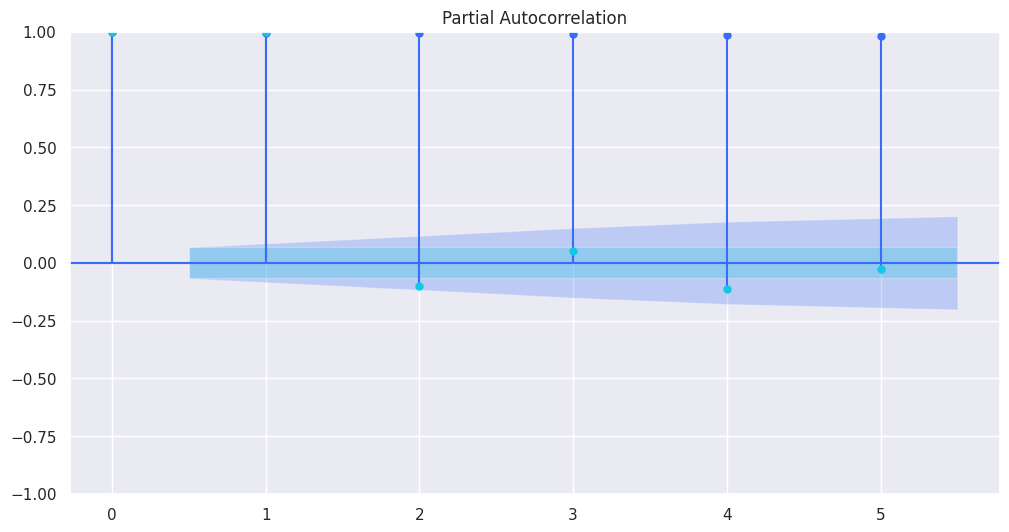

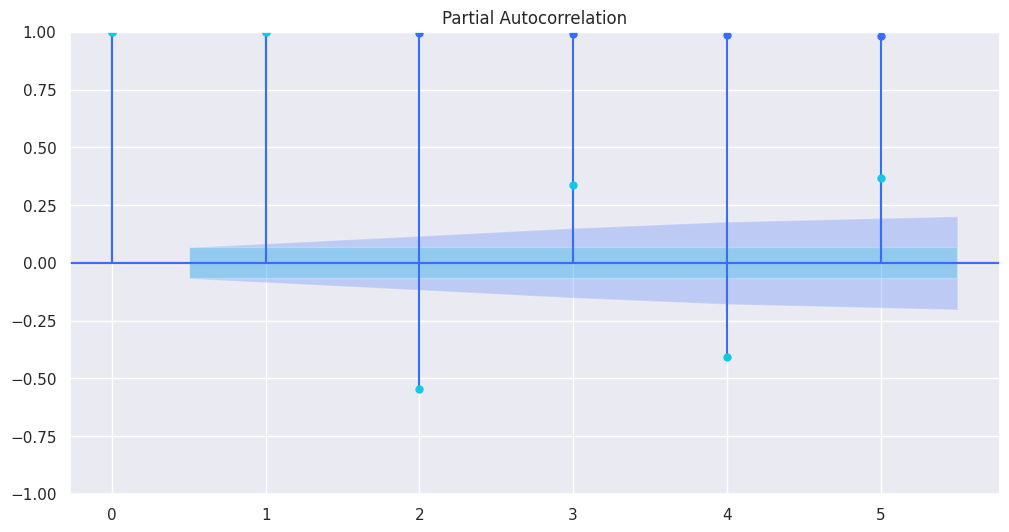

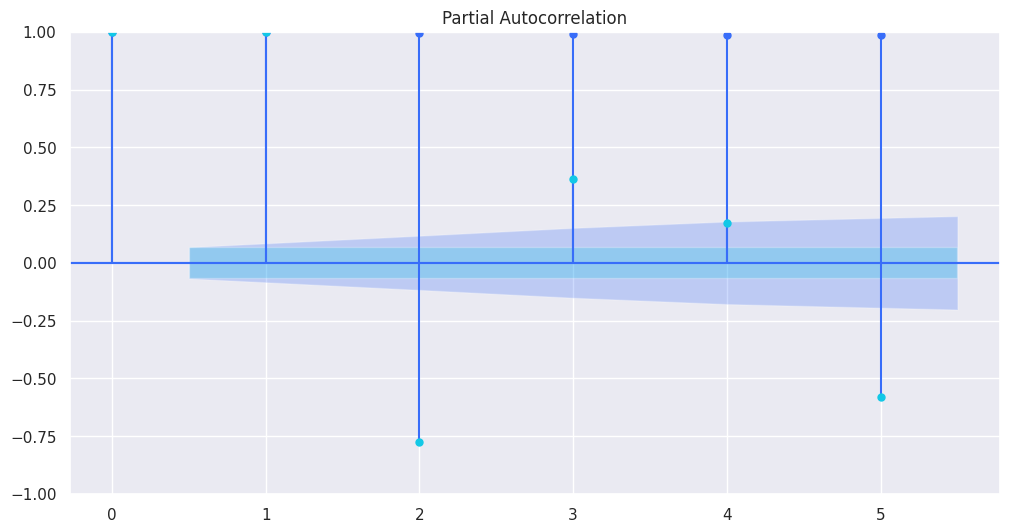

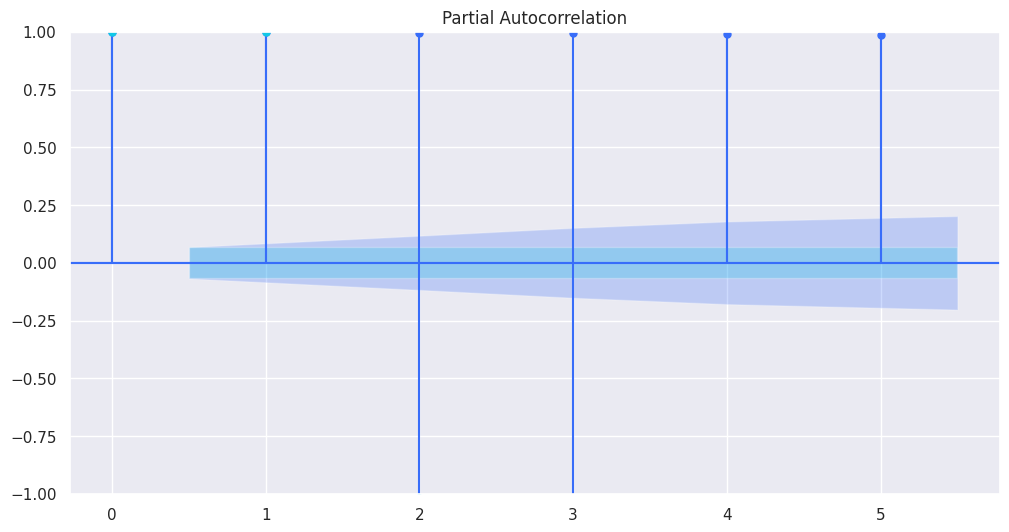

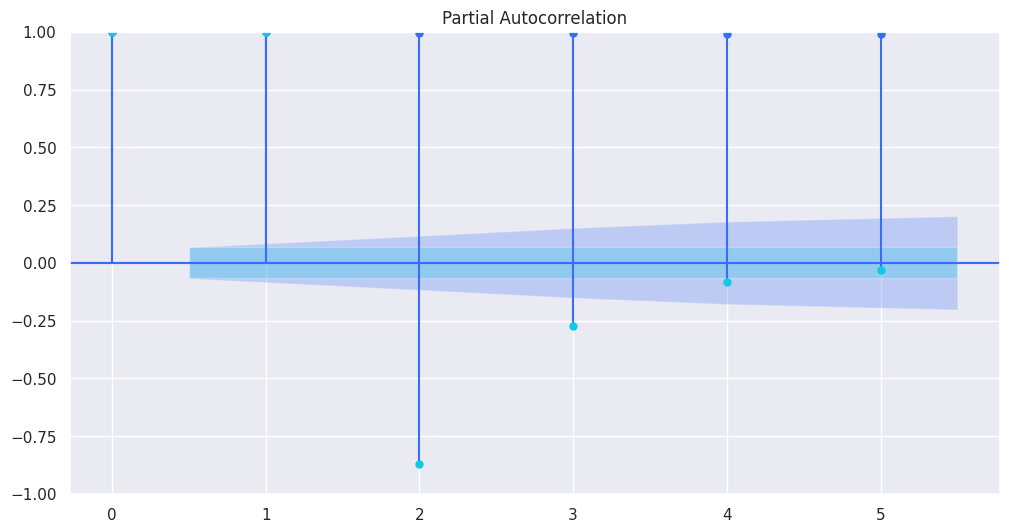

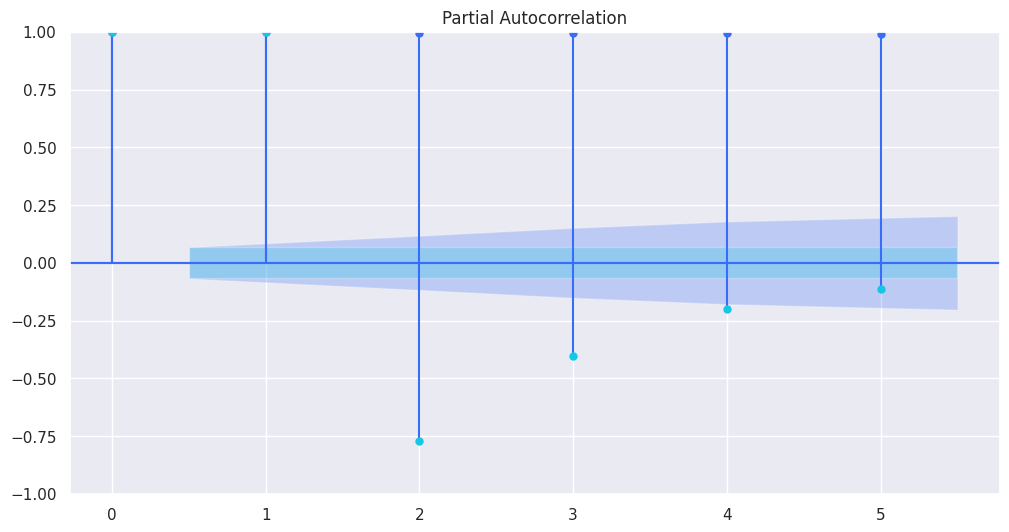

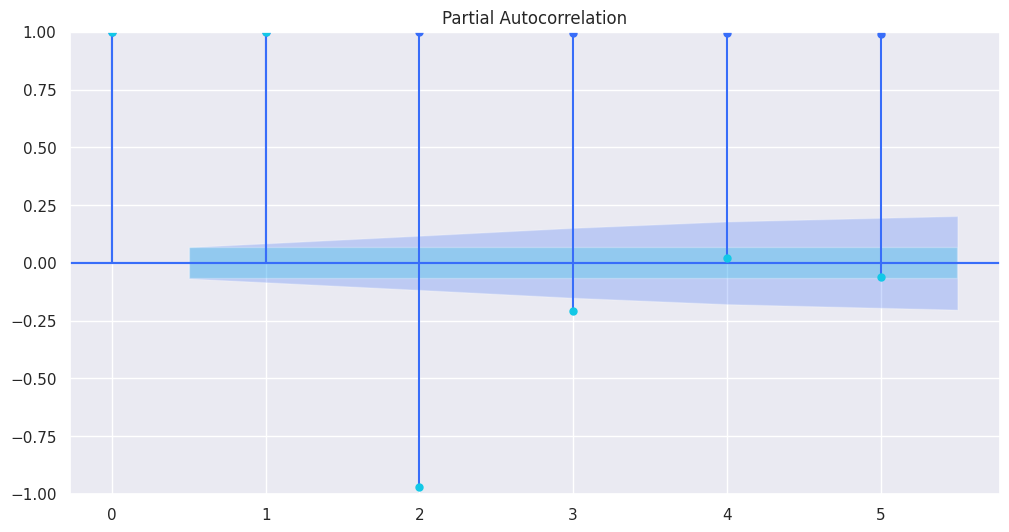

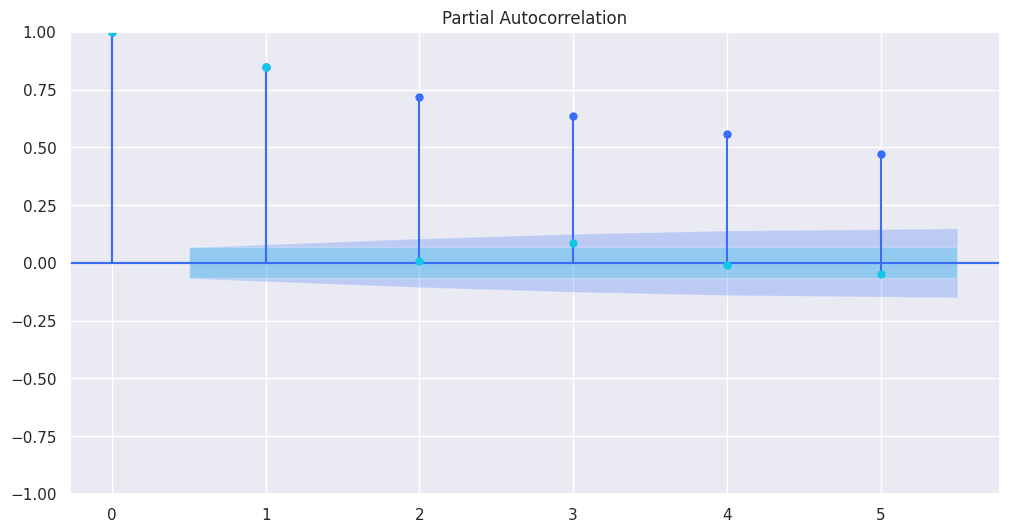

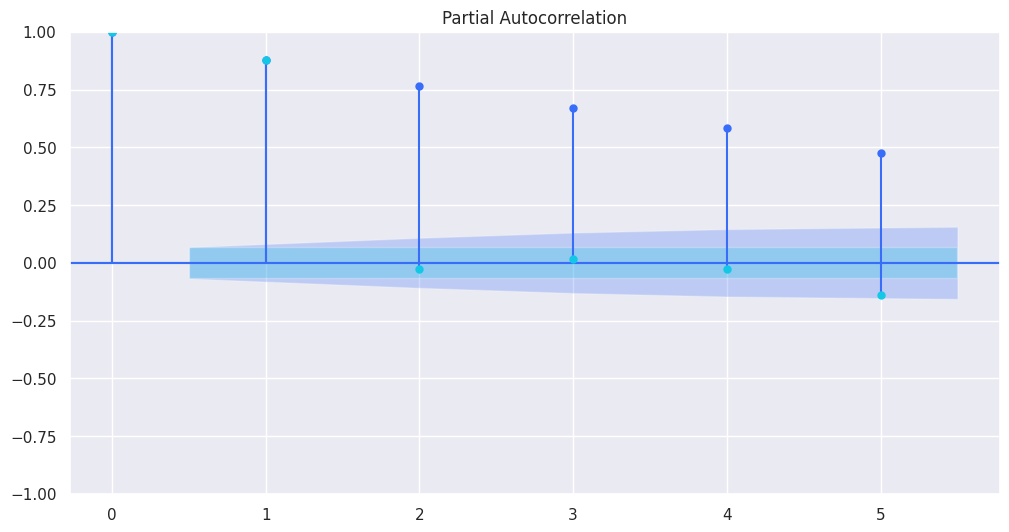

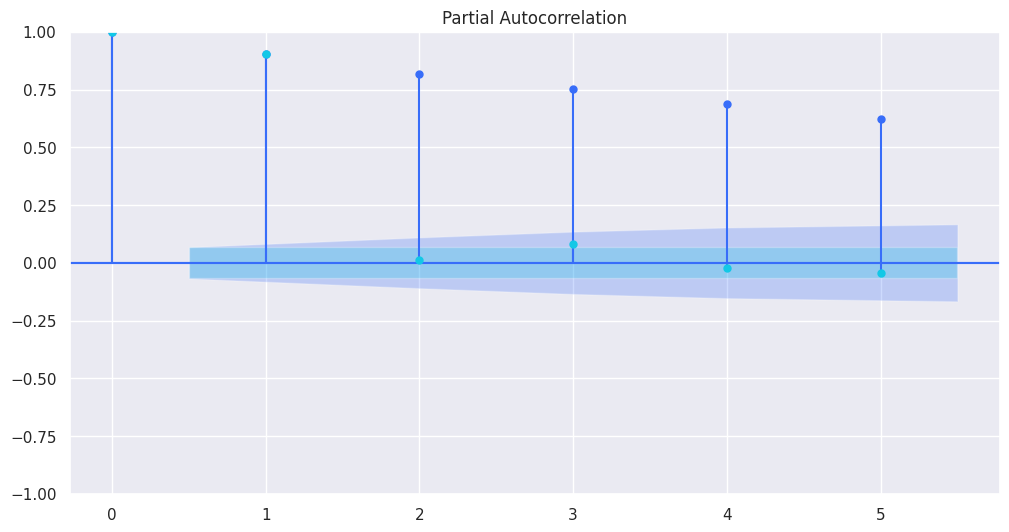

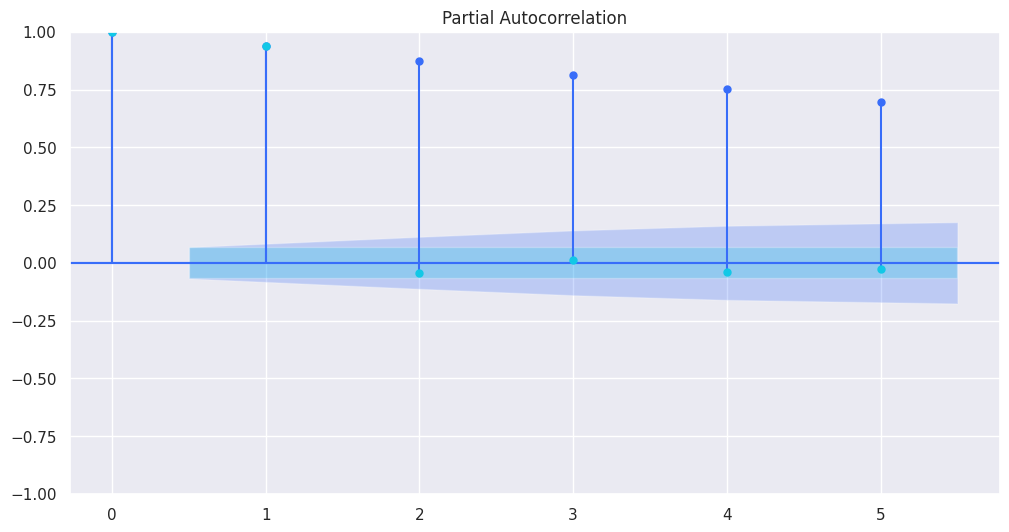

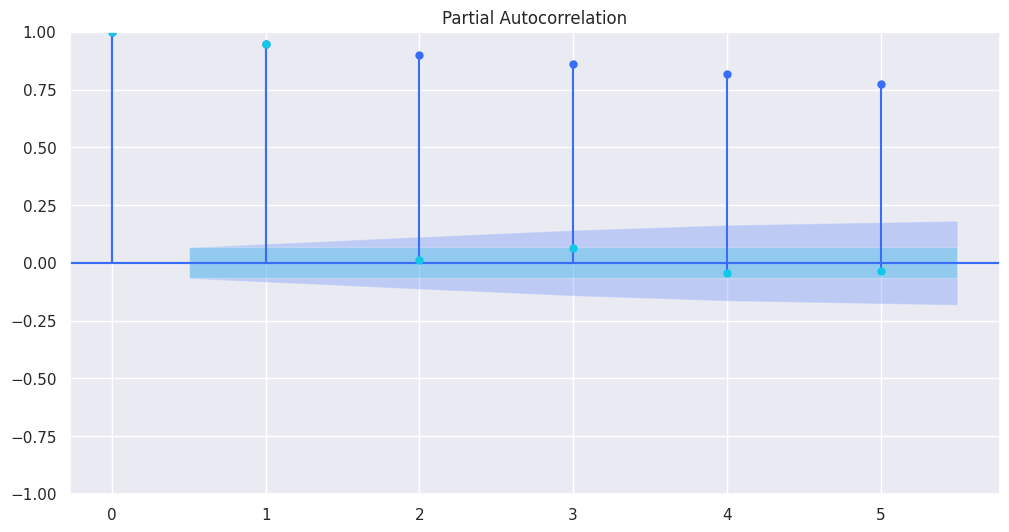

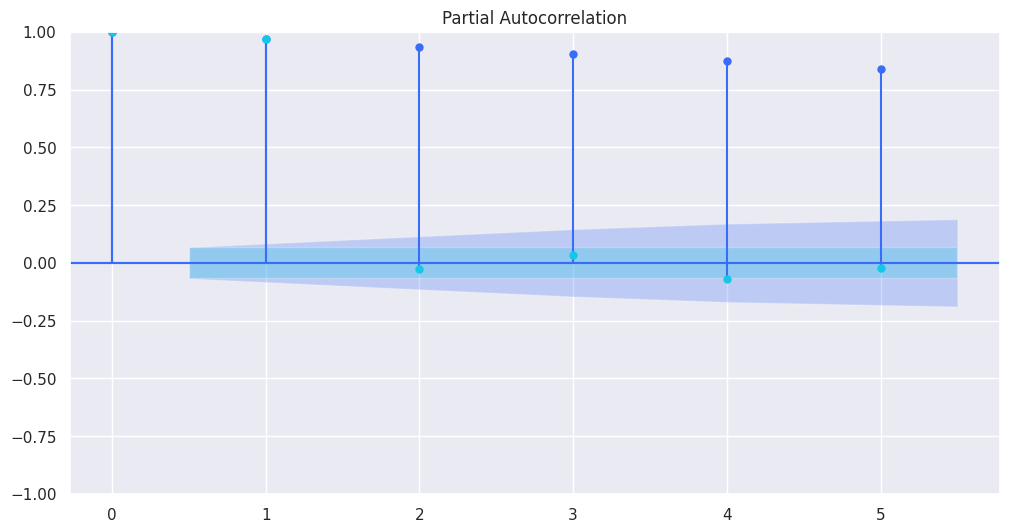

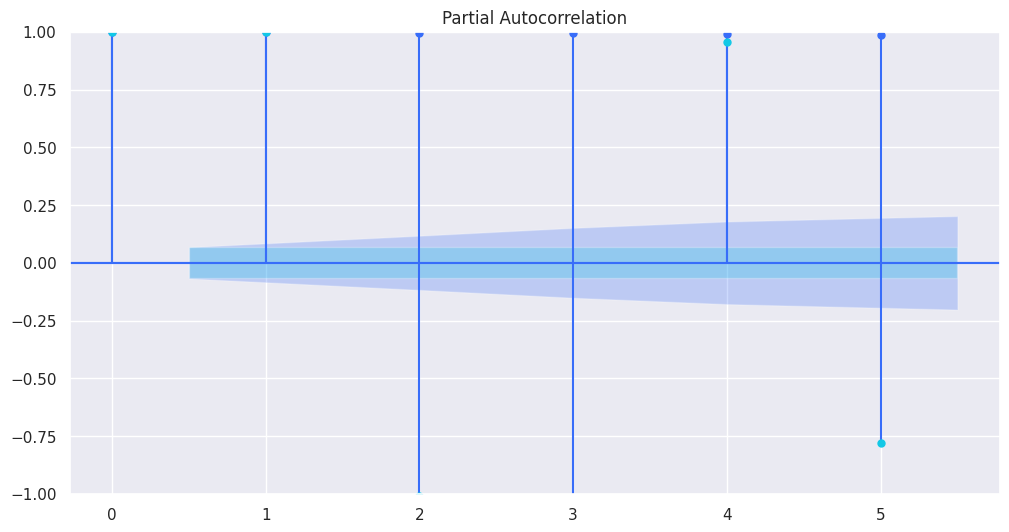

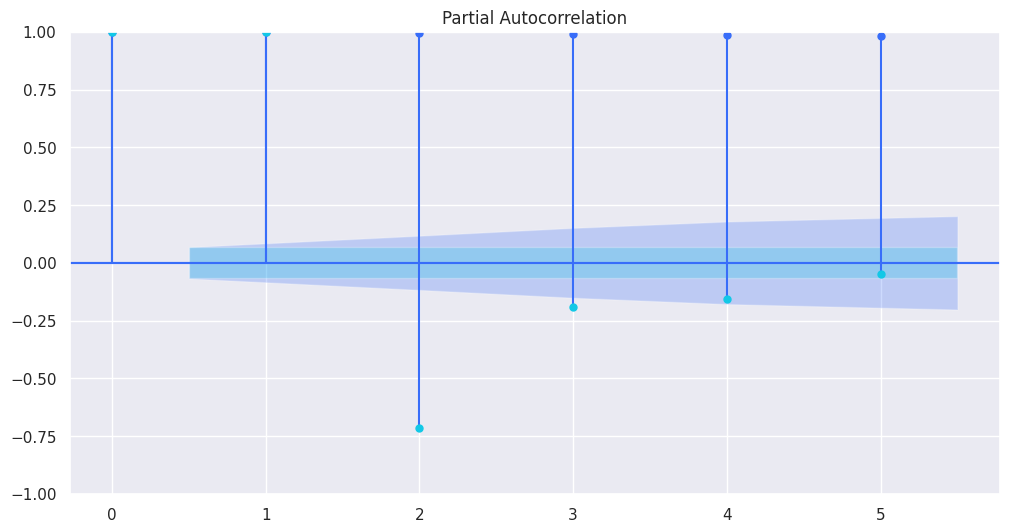

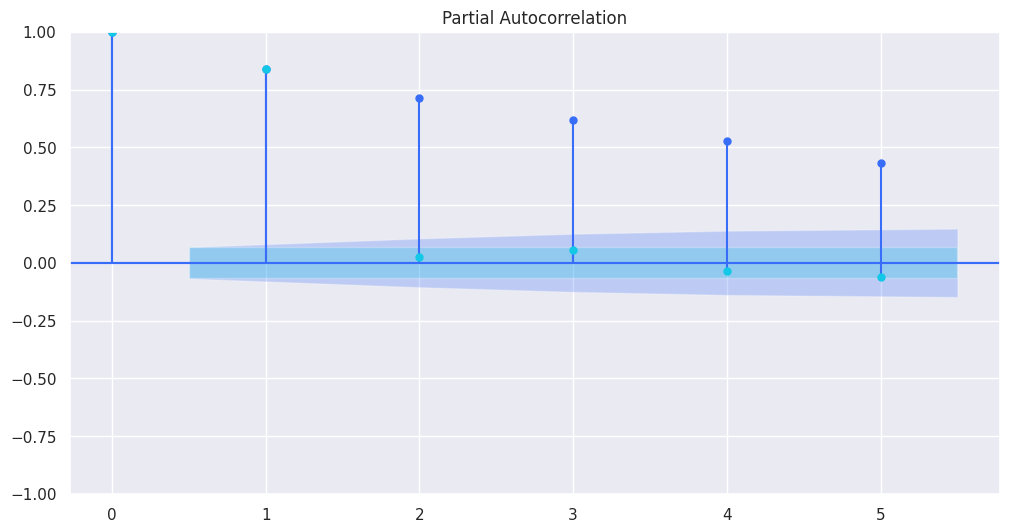

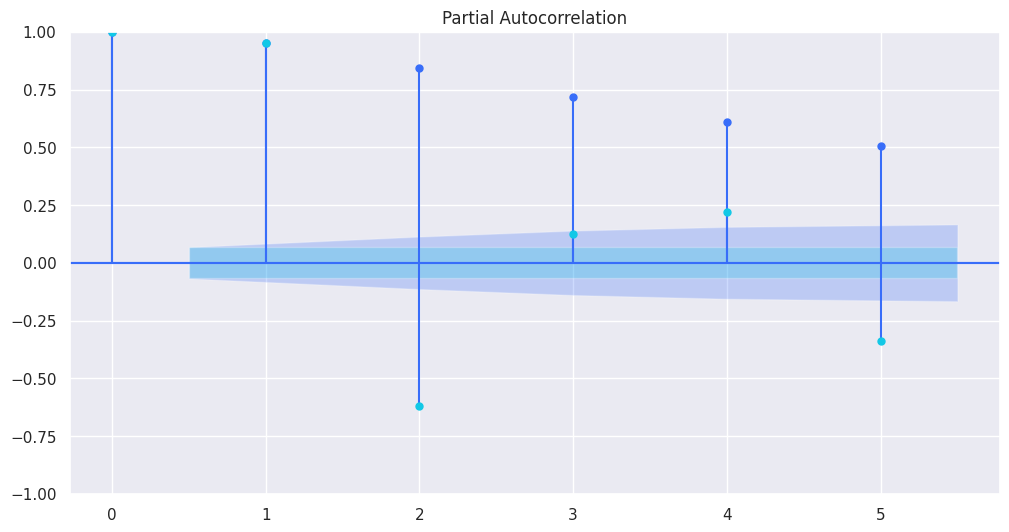

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load time series data


# Plot ACF and PACF with lag = 5
for col in data_model.columns:
  fig, ax = plt.subplots(figsize=(12, 6))
  plot_acf(data_model[col], lags=5, ax=ax)
  plot_pacf(data_model[col], lags=5, ax=ax)
  # plt.xlable(col)
  plt.show()


In [ ]:
# pip install Tensorflow

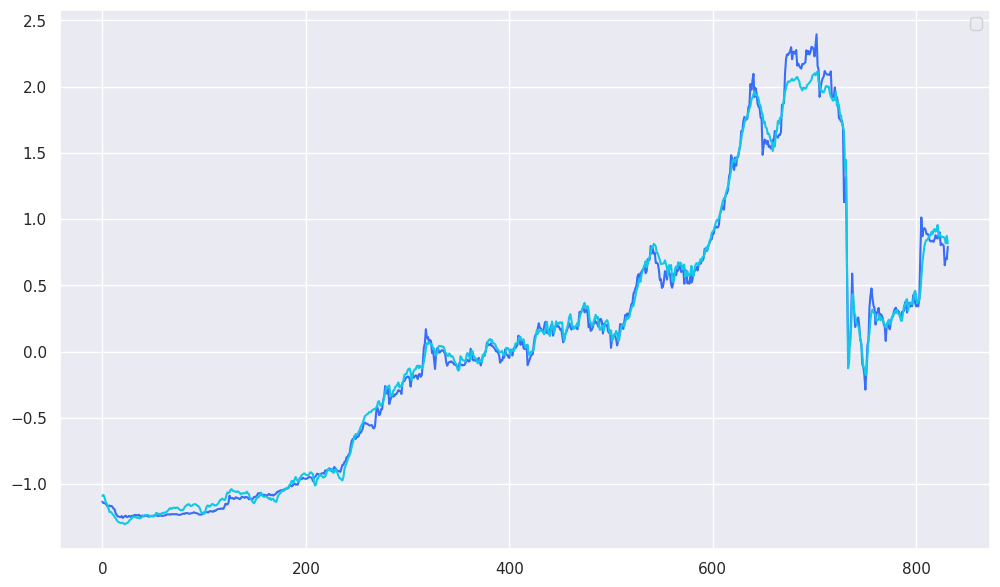

In [104]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,7))
plt.plot(y)
plt.plot(y_pred)
plt.legend()
plt.show()